# Lab05: Regularization Assignment
<hr>

110062802 呂宸漢

In this assignment, we would like to predict the success of shots made by basketball players in the NBA.

## 1. How you evaluate your model.

我將training data分成training和validation set，以training set訓練model並用training set與validation set的error curve選擇好的model與model complexity。

In [1]:
import os
import urllib.request
import pandas as pd

if not os.path.exists("data/"):
    os.mkdir("data/")

urllib.request.urlretrieve(
    "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve(
    "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve(
    "https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X = pd.read_csv('./data/X_train.csv')
y = pd.read_csv('./data/y_train.csv')


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=0)


## 2. All models you have tried and the corresponding results.

* Decision Tree Classifier\
    在max_depth = 4的時候有最好的validation結果，當max_depth > 4時，可以很明顯看出training error變小但validation error變大，即為over-fitting。
* Random Forest Classifier (best model)\
    在max_depth = 9的時候有最好的validation結果，也是在所有model中最好的。
* AdaBoost Classifier\
    在n_estimators = 400的時候有最好的validation結果，可以看到在n_estimators增加到一定數量後無論是training或validation的error rate的變化幅度變很小。
* Gradient Boosting Classifier\
    在n_estimators = 50的時候有最好的validation結果，可以看到n_estimators從1變50時，無論是training或validation的error rate都急速下降，不過在n_estimators > 50後就有點over-fitting的現象。

### Decision Tree Classifier

Accuracy Score:
[max_depth =  1]    training: 0.610    validation: 0.604
[max_depth =  2]    training: 0.610    validation: 0.604
[max_depth =  3]    training: 0.614    validation: 0.608
[max_depth =  4]    training: 0.618    validation: 0.612
[max_depth =  5]    training: 0.620    validation: 0.610
[max_depth =  6]    training: 0.622    validation: 0.610
[max_depth =  7]    training: 0.626    validation: 0.610
[max_depth =  8]    training: 0.630    validation: 0.609
[max_depth =  9]    training: 0.635    validation: 0.607
[max_depth = 10]    training: 0.644    validation: 0.603
[max_depth = 11]    training: 0.655    validation: 0.601
[max_depth = 12]    training: 0.668    validation: 0.595
[max_depth = 13]    training: 0.683    validation: 0.588
[max_depth = 14]    training: 0.702    validation: 0.587
[max_depth = 15]    training: 0.720    validation: 0.581
Best:         4     training: 0.618    validation: 0.612


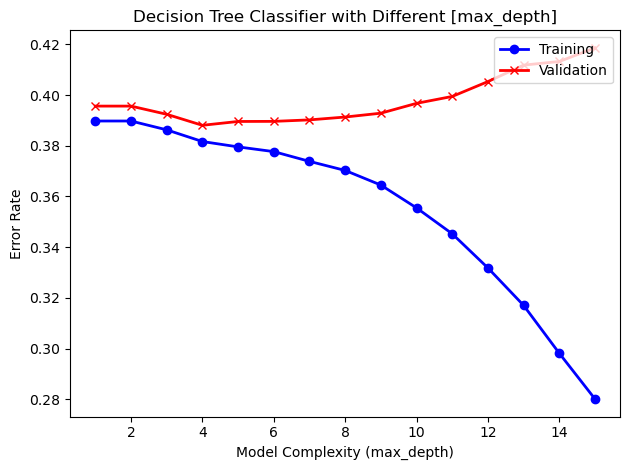

In [3]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

complexity_list = list(range(1, 16))
train_err_list = []
valid_err_list = []

print('Accuracy Score:')
for c in complexity_list:
    clf = DecisionTreeClassifier(max_depth=c, random_state=0)
    clf.fit(X_train, y_train.values.ravel())

    train_acc = clf.score(X_train, y_train)
    valid_acc = clf.score(X_valid, y_valid)
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    print('[max_depth = {:2d}]    training: {:.3f}    validation: {:.3f}'.format(
        c, train_acc, valid_acc))

idx = np.argmin(valid_err_list)
print('Best:        {:2d}     training: {:.3f}    validation: {:.3f}'.format(
    complexity_list[idx], 1 - train_err_list[idx], 1 - valid_err_list[idx]))

plt.plot(complexity_list, train_err_list,
         'bo-', label='Training', linewidth=2)
plt.plot(complexity_list, valid_err_list,
         'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Decision Tree Classifier with Different [max_depth]')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()


### Random Forest

Accuracy Score:
[max_depth =  1]    training: 0.591    validation: 0.585
[max_depth =  2]    training: 0.615    validation: 0.608
[max_depth =  3]    training: 0.617    validation: 0.610
[max_depth =  4]    training: 0.619    validation: 0.611
[max_depth =  5]    training: 0.620    validation: 0.612
[max_depth =  6]    training: 0.622    validation: 0.614
[max_depth =  7]    training: 0.625    validation: 0.613
[max_depth =  8]    training: 0.630    validation: 0.615
[max_depth =  9]    training: 0.637    validation: 0.615
[max_depth = 10]    training: 0.647    validation: 0.614
[max_depth = 11]    training: 0.662    validation: 0.614
[max_depth = 12]    training: 0.681    validation: 0.614
[max_depth = 13]    training: 0.703    validation: 0.612
[max_depth = 14]    training: 0.731    validation: 0.611
[max_depth = 15]    training: 0.761    validation: 0.612
Best:         9     training: 0.637    validation: 0.615


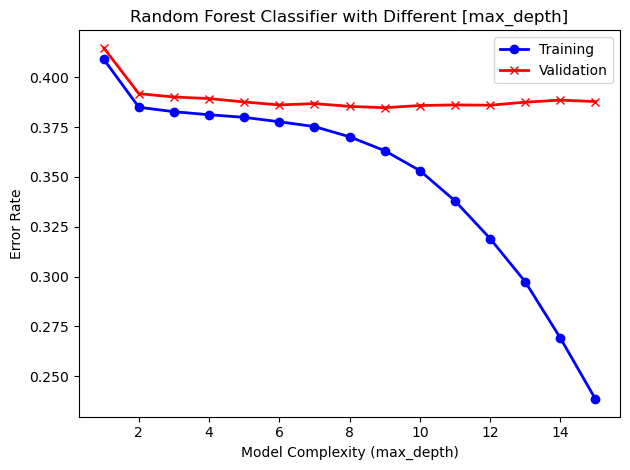

In [4]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

complexity_list = list(range(1, 16))
train_err_list = []
valid_err_list = []

print('Accuracy Score:')
for c in complexity_list:
    clf = RandomForestClassifier(max_depth=c, random_state=0)
    clf.fit(X_train, y_train.values.ravel())

    train_acc = clf.score(X_train, y_train)
    valid_acc = clf.score(X_valid, y_valid)
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    print('[max_depth = {:2d}]    training: {:.3f}    validation: {:.3f}'.format(
        c, train_acc, valid_acc))

idx = np.argmin(valid_err_list)
print('Best:        {:2d}     training: {:.3f}    validation: {:.3f}'.format(
    complexity_list[idx], 1 - train_err_list[idx], 1 - valid_err_list[idx]))

plt.plot(complexity_list, train_err_list,
         'bo-', label='Training', linewidth=2)
plt.plot(complexity_list, valid_err_list,
         'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Random Forest Classifier with Different [max_depth]')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()


### AdaBoost Classifier

Accuracy Score:
[n_estimators =   1]    training: 0.610    validation: 0.604
[n_estimators =   5]    training: 0.610    validation: 0.604
[n_estimators =  10]    training: 0.612    validation: 0.608
[n_estimators =  50]    training: 0.616    validation: 0.610
[n_estimators = 100]    training: 0.619    validation: 0.612
[n_estimators = 150]    training: 0.620    validation: 0.613
[n_estimators = 200]    training: 0.620    validation: 0.613
[n_estimators = 300]    training: 0.621    validation: 0.613
[n_estimators = 400]    training: 0.621    validation: 0.614
[n_estimators = 500]    training: 0.622    validation: 0.613
Best:           400     training: 0.621    validation: 0.614


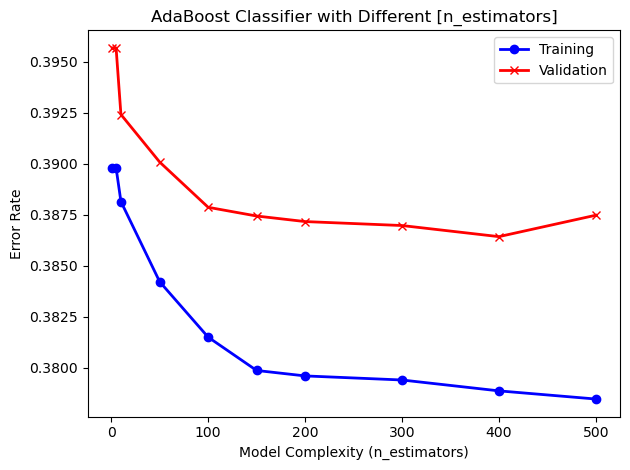

In [5]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt

complexity_list = [1, 5, 10, 50, 100, 150, 200, 300, 400, 500]
train_err_list = []
valid_err_list = []

print('Accuracy Score:')
for c in complexity_list:
    clf = AdaBoostClassifier(n_estimators=c, random_state=0)
    clf.fit(X_train, y_train.values.ravel())

    train_acc = clf.score(X_train, y_train)
    valid_acc = clf.score(X_valid, y_valid)
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    print('[n_estimators = {:3d}]    training: {:.3f}    validation: {:.3f}'.format(
        c, train_acc, valid_acc))

idx = np.argmin(valid_err_list)
print('Best:           {:3d}     training: {:.3f}    validation: {:.3f}'.format(
    complexity_list[idx], 1 - train_err_list[idx], 1 - valid_err_list[idx]))

plt.plot(complexity_list, train_err_list,
         'bo-', label='Training', linewidth=2)
plt.plot(complexity_list, valid_err_list,
         'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('AdaBoost Classifier with Different [n_estimators]')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()


### Gradient Boosting Classifier

Accuracy Score:
[n_estimators =   1]    training: 0.548    validation: 0.541
[n_estimators =   5]    training: 0.615    validation: 0.607
[n_estimators =  10]    training: 0.618    validation: 0.611
[n_estimators =  50]    training: 0.623    validation: 0.613
[n_estimators = 100]    training: 0.624    validation: 0.613
[n_estimators = 150]    training: 0.626    validation: 0.613
[n_estimators = 200]    training: 0.628    validation: 0.613
[n_estimators = 300]    training: 0.631    validation: 0.612
[n_estimators = 400]    training: 0.634    validation: 0.611
[n_estimators = 500]    training: 0.637    validation: 0.611
Best:            50     training: 0.623    validation: 0.613


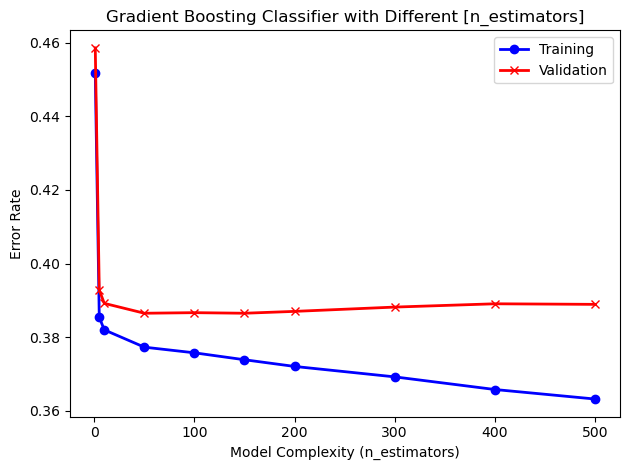

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

print('Accuracy Score:')
complexity_list = [1, 5, 10, 50, 100, 150, 200, 300, 400, 500]
train_err_list = []
valid_err_list = []

for c in complexity_list:
    clf = GradientBoostingClassifier(n_estimators=c, random_state=0)
    clf.fit(X_train, y_train.values.ravel())

    train_acc = clf.score(X_train, y_train)
    valid_acc = clf.score(X_valid, y_valid)
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    print('[n_estimators = {:3d}]    training: {:.3f}    validation: {:.3f}'.format(
        c, train_acc, valid_acc))

idx = np.argmin(valid_err_list)
print('Best:           {:3d}     training: {:.3f}    validation: {:.3f}'.format(
    complexity_list[idx], 1 - train_err_list[idx], 1 - valid_err_list[idx]))

plt.plot(complexity_list, train_err_list,
         'bo-', label='Training', linewidth=2)
plt.plot(complexity_list, valid_err_list,
         'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Gradient Boosting Classifier with Different [n_estimators]')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()


## 3. Plot the error curve of your best model and tell if it is over-fit or not.

我選出的best model為Random Forset Classifier (depth = 9)，由error curve來看並無over-fitting。

Accuracy Score:
[max_depth =  1]    training: 0.591    validation: 0.585
[max_depth =  2]    training: 0.615    validation: 0.608
[max_depth =  3]    training: 0.617    validation: 0.610
[max_depth =  4]    training: 0.619    validation: 0.611
[max_depth =  5]    training: 0.620    validation: 0.612
[max_depth =  6]    training: 0.622    validation: 0.614
[max_depth =  7]    training: 0.625    validation: 0.613
[max_depth =  8]    training: 0.630    validation: 0.615
[max_depth =  9]    training: 0.637    validation: 0.615
[max_depth = 10]    training: 0.647    validation: 0.614
[max_depth = 11]    training: 0.662    validation: 0.614
[max_depth = 12]    training: 0.681    validation: 0.614
[max_depth = 13]    training: 0.703    validation: 0.612
[max_depth = 14]    training: 0.731    validation: 0.611
[max_depth = 15]    training: 0.761    validation: 0.612
Best:         9     training: 0.637    validation: 0.615


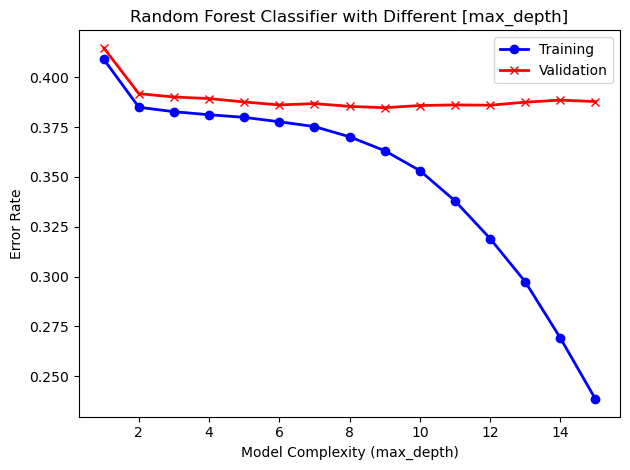

In [7]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

complexity_list = list(range(1, 16))
train_err_list = []
valid_err_list = []

print('Accuracy Score:')
for c in complexity_list:
    clf = RandomForestClassifier(max_depth=c, random_state=0)
    clf.fit(X_train, y_train.values.ravel())

    train_acc = clf.score(X_train, y_train)
    valid_acc = clf.score(X_valid, y_valid)
    train_err_list.append(1 - train_acc)
    valid_err_list.append(1 - valid_acc)
    print('[max_depth = {:2d}]    training: {:.3f}    validation: {:.3f}'.format(
        c, train_acc, valid_acc))

idx = np.argmin(valid_err_list)
print('Best:        {:2d}     training: {:.3f}    validation: {:.3f}'.format(
    complexity_list[idx], 1 - train_err_list[idx], 1 - valid_err_list[idx]))

plt.plot(complexity_list, train_err_list,
         'bo-', label='Training', linewidth=2)
plt.plot(complexity_list, valid_err_list,
         'rx-', label='Validation', linewidth=2)
plt.legend(loc='upper right')
plt.title('Random Forest Classifier with Different [max_depth]')
plt.xlabel('Model Complexity (max_depth)')
plt.ylabel('Error Rate')
plt.tight_layout()
plt.show()


## 4-1. The top-3 features you find and how you find it.

Top-3 Features:
1. SHOT_DIST
2. CLOSE_DEF_DIST
3. SHOT_CLOCK

由於我的best model是Random Forest Classifier (max_depth = 9)，只需要先用此model fit還沒有拿掉feature的training set，即可從model中的feature_importances_取得每個feature的importance，取前三個importance高的feature即為top-3 features。

In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train, y_train.values.ravel())

feature_names = X.columns.to_numpy()
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print('Feature Importance:')
for i, idx in enumerate(indices):
    print('({:d}) {:20s} {:f}'.format(
        i + 1, feature_names[idx], importances[idx]))

top3_feature = feature_names[indices[0:3]]
print('\nTop-3 Features:', top3_feature)

Feature Importance:
(1) SHOT_DIST            0.400287
(2) CLOSE_DEF_DIST       0.152502
(3) SHOT_CLOCK           0.128006
(4) TOUCH_TIME           0.116181
(5) PTS_TYPE             0.073177
(6) GAME_CLOCK           0.066694
(7) DRIBBLES             0.042613
(8) PERIOD               0.020540

Top-3 Features: ['SHOT_DIST' 'CLOSE_DEF_DIST' 'SHOT_CLOCK']


## 4-2. Show the accuracy with only top-3 features.

將原本的dataset改成只有這三個feature後再以我的best model做training可以看到training accuracy可達0.635且validation accuracy可達0.61，與原先使用所有的feature做training的結果(training accuracy: 0.637，validation accuracy: 0.615)相去不遠。

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X_new = X[top3_feature]
X_train, X_valid, y_train, y_valid = train_test_split(
    X_new, y, test_size=0.3, random_state=0)

clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train, y_train.values.ravel())

train_acc = clf.score(X_train, y_train)
valid_acc = clf.score(X_valid, y_valid)
print('Accuracy Score: (only 3 features)')
print('[max_depth =  9]    training: {:.3f}    validation: {:.3f}'.format(
    train_acc, valid_acc))

X_test = pd.read_csv('./data/X_test.csv')
X_test = X_test[top3_feature]
y_pred = clf.predict(X_test)

df = pd.DataFrame(y_pred, columns=y.columns)
df.to_csv('Lab05_110062802_y_pred.csv', index=False)


Accuracy Score: (only 3 features)
[max_depth =  9]    training: 0.635    validation: 0.610


## 5. A brief report what you do in this assignment.

如上implementation的流程：
1. 將training data分成training set與validation set以測試與選擇不同的model與model complexity。
2. 利用上述dataset測試不同的model，最後得到best model為Random Forest Classifier (depth = 9)。
3. 利用best model選擇top-3的feature並用其training，可得0.635的training accuracy與0.61的testing accuracy。
